In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sportsipy.nfl import *

In [ ]:
squares_df = pd.read_csv('../data/superbowlsquares_final.csv')

In [ ]:
squares_df.head()

#create another df called cumul_squares to do a valuations on all occurrences

In [157]:
# %%
# I need to take the individual events and transform them
# count occurrences of each combination of home and away q4 scores
#change into a longform 
#      home/away        0     1       2       3       4
#        3              7     2       3
#       7               0     0       4

# Setting our two variables that together will define a unique occurrence. Only games with matching results will count as an occurrence
g_q1 = squares_df.groupby(['home_endq1', 'away_endq1'])
g_q2 = squares_df.groupby(['home_endq2', 'away_endq2'])
g_q3 = squares_df.groupby(['home_endq3', 'away_endq3'])
g_q4 = squares_df.groupby(['home_endq4', 'away_endq4'])

# get number of unique combinations of home and away for each boxscore URI - mostly a dedup for lazy data cleaning
q1_score_count = g_q1.boxscore.nunique()
q2_score_count = g_q2.boxscore.nunique()
q3_score_count = g_q3.boxscore.nunique()
q4_score_count = g_q4.boxscore.nunique()




In [158]:
# Create a pivot table with Q1-Q4 scores. Define the values (unique entries) as the boxscore URIs
q1_score_count = q1_score_count.reset_index().pivot(index='home_endq1', columns='away_endq1', values='boxscore')
q2_score_count = q2_score_count.reset_index().pivot(index='home_endq2', columns='away_endq2', values='boxscore')
q3_score_count = q3_score_count.reset_index().pivot(index='home_endq3', columns='away_endq3', values='boxscore')
q4_score_count = q4_score_count.reset_index().pivot(index='home_endq4', columns='away_endq4', values='boxscore')


In [161]:

# We need 0s instead of nulls where there weren't any occurrences. Repeat for all Qs
q1_score_count.fillna(0, inplace=True)
q1_score_count.describe()
q2_score_count.fillna(0, inplace=True)
q2_score_count.describe()
q3_score_count.fillna(0, inplace=True)
q3_score_count.describe()
q4_score_count.fillna(0, inplace=True)
q4_score_count.describe()

away_endq4,0,1,2,3,4,5,7,8,9
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.333333,0.777778,0.222222,0.444444,0.555556,0.111111,0.555556,0.111111,0.222222
std,0.707107,0.833333,0.440959,0.527046,0.527046,0.333333,0.726483,0.333333,0.440959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000


In [162]:

# %%
# Reindexing the score_count so that it has a defined range on each axis, as an integer, and doesn't make jumps where we have a gap.
q1_score_count = q1_score_count.reindex(range(0,10), axis=0, fill_value=0).astype(int)
q1_score_count = q1_score_count.reindex(range(0,10), axis=1, fill_value=0).astype(int)
q2_score_count = q2_score_count.reindex(range(0,10), axis=0, fill_value=0).astype(int)
q2_score_count = q2_score_count.reindex(range(0,10), axis=1, fill_value=0).astype(int)
q3_score_count = q3_score_count.reindex(range(0,10), axis=0, fill_value=0).astype(int)
q3_score_count = q3_score_count.reindex(range(0,10), axis=1, fill_value=0).astype(int)
q4_score_count = q4_score_count.reindex(range(0,10), axis=0, fill_value=0).astype(int)
q4_score_count = q4_score_count.reindex(range(0,10), axis=1, fill_value=0).astype(int)


<AxesSubplot:xlabel='away_endq4', ylabel='home_endq4'>

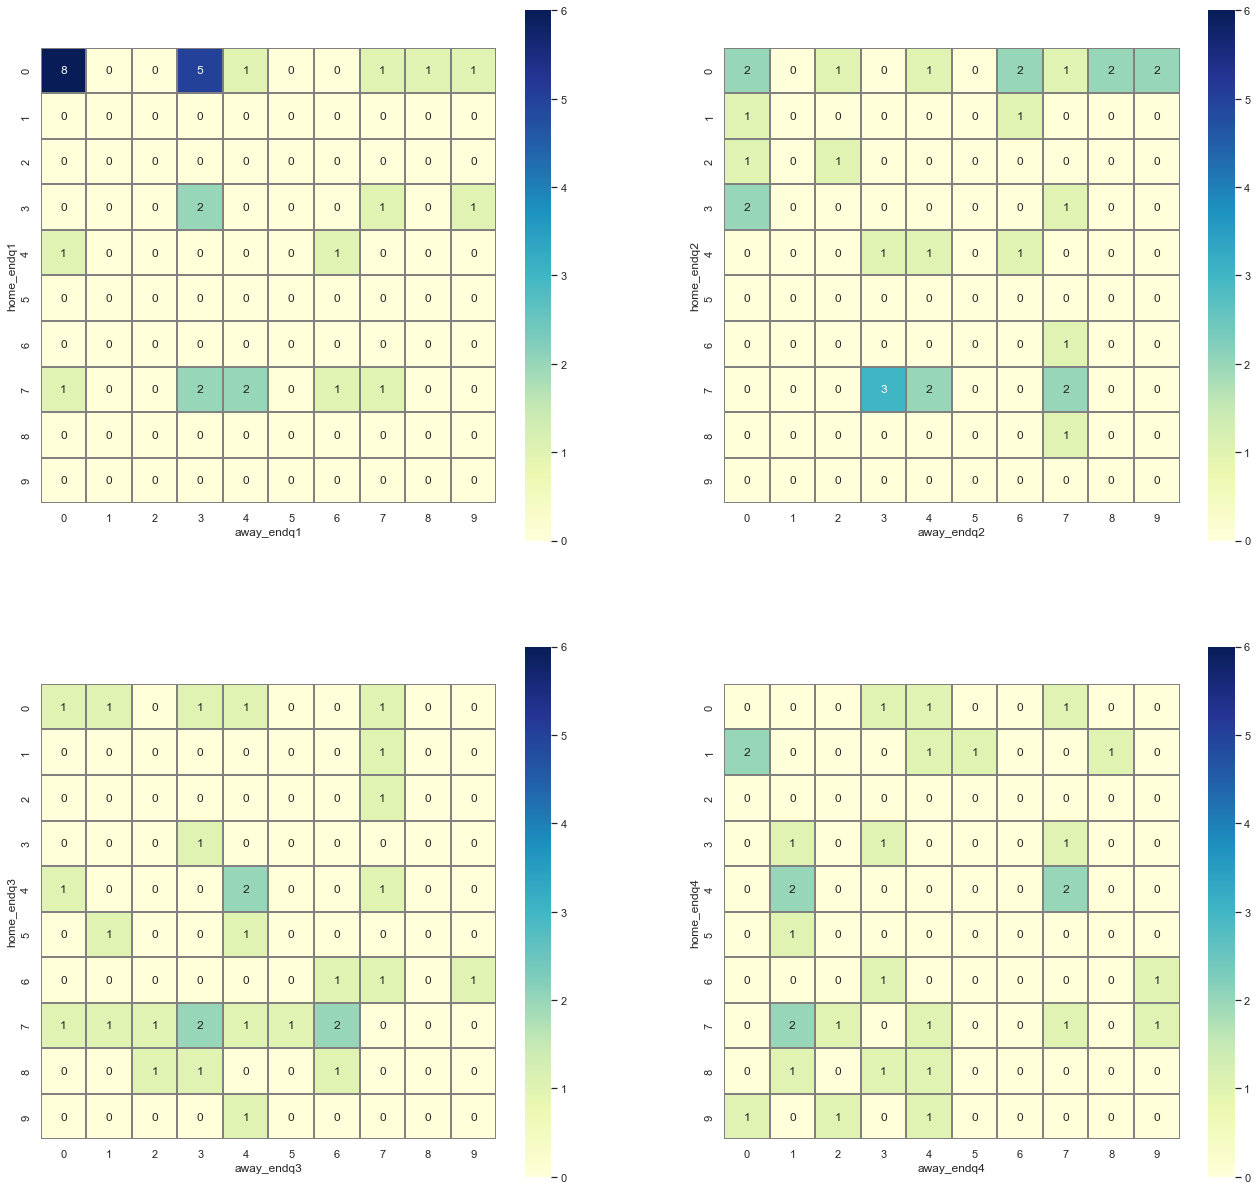

In [163]:
sns.set()

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)



sns.heatmap(q1_score_count, ax=ax1, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, vmin=0, vmax=6, square=True)
sns.heatmap(q2_score_count, ax=ax2, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, vmin=0, vmax=6, square=True)
sns.heatmap(q3_score_count, ax=ax3, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, vmin=0, vmax=6, square=True)
sns.heatmap(q4_score_count, ax=ax4, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, vmin=0, vmax=6, square=True)


In [164]:
homeq1list = list(squares_df['home_endq1'])
homeq2list = list(squares_df['home_endq2'])
homeq3list = list(squares_df['home_endq3'])
homeq4list = list(squares_df['home_endq4'])
awayq1list = list(squares_df['away_endq1'])
awayq2list = list(squares_df['away_endq2'])
awayq3list = list(squares_df['away_endq3'])
awayq4list = list(squares_df['away_endq4'])

In [165]:
homescores = [*homeq1list, *homeq2list, *homeq3list, *homeq4list]
awayscores = [*awayq1list, *awayq2list, *awayq3list, *awayq4list]


In [166]:
print(homescores)

[3, 0, 7, 7, 7, 7, 0, 0, 7, 3, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 4, 0, 7, 0, 0, 0, 3, 0, 7, 2, 0, 0, 0, 8, 0, 3, 7, 7, 6, 0, 0, 4, 3, 0, 7, 7, 4, 7, 7, 0, 1, 0, 1, 0, 4, 7, 2, 3, 0, 2, 0, 7, 0, 5, 8, 0, 5, 4, 6, 6, 7, 7, 9, 0, 4, 4, 7, 7, 7, 7, 1, 7, 8, 8, 4, 7, 6, 3, 0, 9, 4, 7, 0, 8, 6, 7, 5, 1, 9, 6, 7, 0, 1, 9, 4, 1, 7, 4, 3, 7, 1, 7, 4, 8, 8, 0, 3, 3, 1]


In [167]:
print(len(awayscores))

120


In [168]:
allscoresdict = {'homescores': homescores, 'awayscores':awayscores}

allscores_df = pd.DataFrame(allscoresdict)

In [169]:
allscores_df.head()

,homescores,awayscores
0,3,3
1,0,0
2,7,4
3,7,6
4,7,0


In [170]:
import uuid 
for i in range(0,121):
    allscores_df.loc[i, 'unique_id'] = uuid.uuid4()


allscores_df.head()

,homescores,awayscores,unique_id
0,3.0,3.0,dacbd6dd-e2c6-4f74-8fad-900786f84d3a
1,0.0,0.0,7a558b42-9bea-4b8d-bb33-01e0ca9f3d3b
2,7.0,4.0,ed2b1c6a-bdb0-4bd9-aaf4-728432c7910a
3,7.0,6.0,dfd2c2ca-3020-4dad-b45d-5f74815fa2af
4,7.0,0.0,444fb676-27df-4efd-a749-56aeacbc634e


In [171]:
print(allscores_df)

     homescores  awayscores                             unique_id
0           3.0         3.0  dacbd6dd-e2c6-4f74-8fad-900786f84d3a
1           0.0         0.0  7a558b42-9bea-4b8d-bb33-01e0ca9f3d3b
2           7.0         4.0  ed2b1c6a-bdb0-4bd9-aaf4-728432c7910a
3           7.0         6.0  dfd2c2ca-3020-4dad-b45d-5f74815fa2af
4           7.0         0.0  444fb676-27df-4efd-a749-56aeacbc634e
..          ...         ...                                   ...
116         0.0         4.0  7b2d8864-4764-4ea7-828e-fc30b7d470b7
117         3.0         1.0  02d2acb7-dea9-4823-b67f-60fcc999ecec
118         3.0         3.0  d23df75c-9fa4-4b27-a4c8-24ce0fc3c932
119         1.0         0.0  ca9b7c0d-988a-40ee-9a9a-d731b6e1c7bb
120         NaN         NaN  8a8c9dea-37f1-4677-a42a-f9d7d8aa5768

[121 rows x 3 columns]


In [172]:
allscores_df.dropna(axis=0, how='any', inplace=True)

allscores_df.tail()

,homescores,awayscores,unique_id
115,8.0,4.0,b5b534fd-d3e5-4832-8384-2515fb6c138d
116,0.0,4.0,7b2d8864-4764-4ea7-828e-fc30b7d470b7
117,3.0,1.0,02d2acb7-dea9-4823-b67f-60fcc999ecec
118,3.0,3.0,d23df75c-9fa4-4b27-a4c8-24ce0fc3c932
119,1.0,0.0,ca9b7c0d-988a-40ee-9a9a-d731b6e1c7bb


In [173]:

g_allscores = allscores_df.groupby(['homescores', 'awayscores'])

allscores_count = g_allscores.unique_id.nunique()

allscores_count = allscores_count.reset_index().pivot(index='homescores', columns='awayscores', values='unique_id')





In [174]:
print(allscores_count)

awayscores   0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
homescores                                                   
0.0         11.0  1.0  1.0  7.0  4.0  NaN  2.0  4.0  3.0  3.0
1.0          3.0  NaN  NaN  NaN  1.0  1.0  1.0  1.0  1.0  NaN
2.0          1.0  NaN  1.0  NaN  NaN  NaN  NaN  1.0  NaN  NaN
3.0          2.0  1.0  NaN  4.0  NaN  NaN  NaN  3.0  NaN  1.0
4.0          2.0  2.0  NaN  1.0  3.0  NaN  2.0  3.0  NaN  NaN
5.0          NaN  2.0  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN
6.0          NaN  NaN  NaN  1.0  NaN  NaN  1.0  2.0  NaN  2.0
7.0          2.0  3.0  2.0  7.0  6.0  1.0  3.0  4.0  NaN  1.0
8.0          NaN  1.0  1.0  2.0  1.0  NaN  1.0  1.0  NaN  NaN
9.0          1.0  NaN  1.0  NaN  2.0  NaN  NaN  NaN  NaN  NaN


In [175]:
allscores_count.fillna(0, inplace=True)
allscores_count.isnull().sum()



awayscores
0.0    0
1.0    0
2.0    0
3.0    0
4.0    0
5.0    0
6.0    0
7.0    0
8.0    0
9.0    0
dtype: int64

In [176]:
allscores_count = allscores_count.reindex(range(0,9), axis=0, fill_value=0).astype(int)

<AxesSubplot:xlabel='awayscores', ylabel='homescores'>

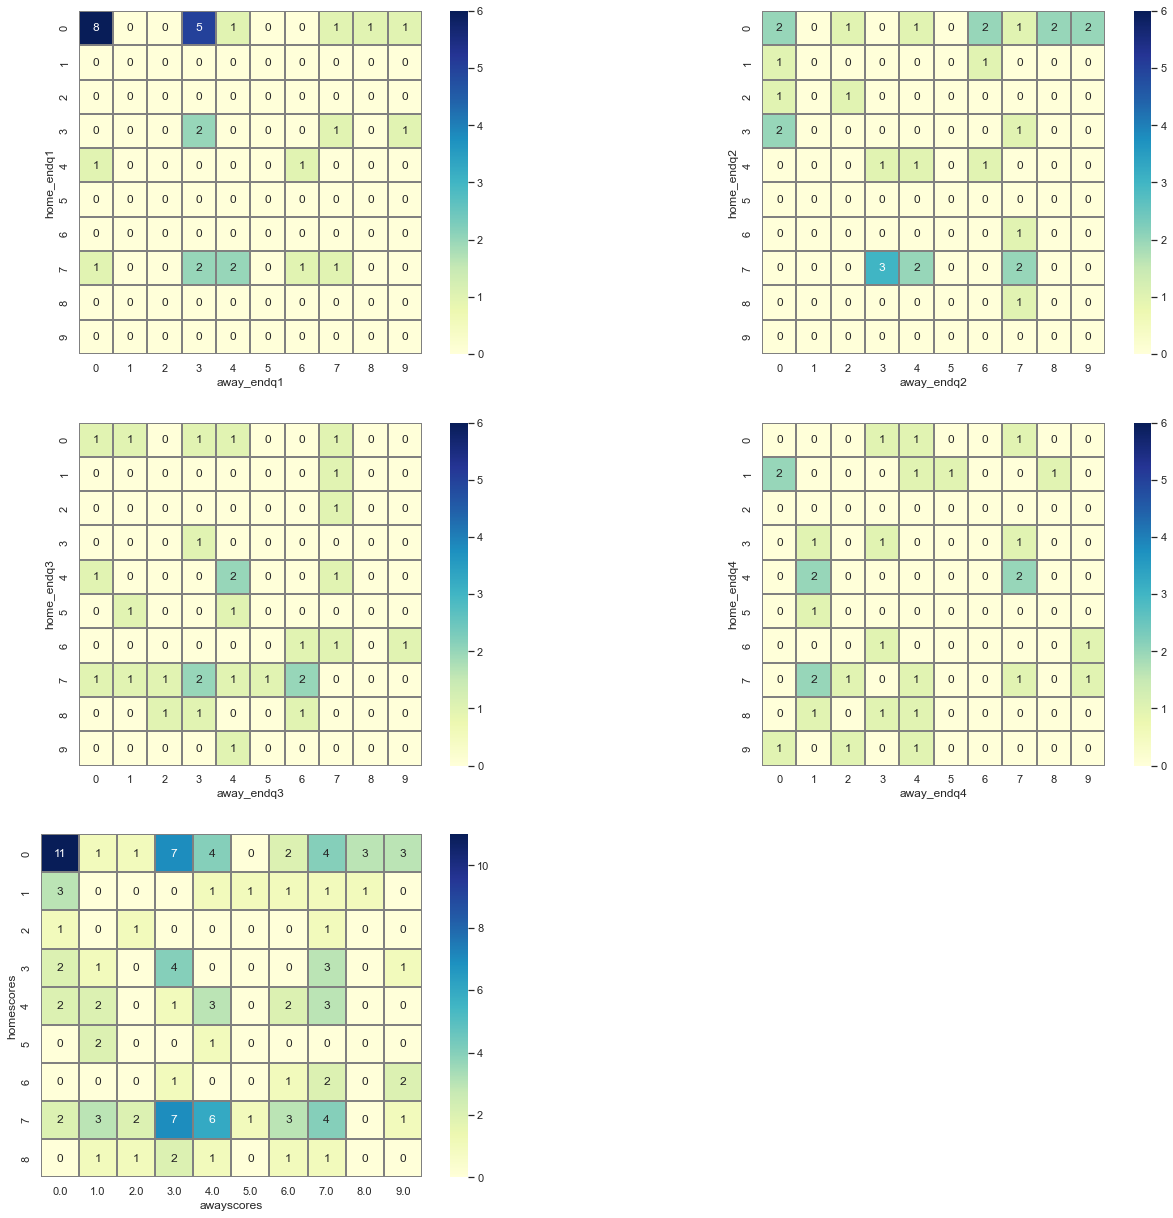

In [177]:
sns.set()

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)


sns.heatmap(q1_score_count, ax=ax1, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, vmin=0, vmax=6, square=True)
sns.heatmap(q2_score_count, ax=ax2, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, vmin=0, vmax=6, square=True)
sns.heatmap(q3_score_count, ax=ax3, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, vmin=0, vmax=6, square=True)
sns.heatmap(q4_score_count, ax=ax4, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, vmin=0, vmax=6, square=True)
sns.heatmap(allscores_count, ax=ax5, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, square=True)
#plt.savefig('SB_Squares_Heatmaps.png', dpi=120)

In [178]:
allscores_df.head()

,homescores,awayscores,unique_id
0,3.0,3.0,dacbd6dd-e2c6-4f74-8fad-900786f84d3a
1,0.0,0.0,7a558b42-9bea-4b8d-bb33-01e0ca9f3d3b
2,7.0,4.0,ed2b1c6a-bdb0-4bd9-aaf4-728432c7910a
3,7.0,6.0,dfd2c2ca-3020-4dad-b45d-5f74815fa2af
4,7.0,0.0,444fb676-27df-4efd-a749-56aeacbc634e


In [116]:
superbowls = pd.read_csv('../data/superbowlsquares_final.csv')

In [121]:
superbowls.head()

,boxscore,Unnamed: 0,Unnamed: 0.1,away_name,away_abbr,away_score,home_name,home_abbr,home_score,winning_name,...,away_q3,away_q4,home_endq1,home_endq2,home_endq3,home_endq4,away_endq1,away_endq2,away_endq3,away_endq4
0,199101270buf,0,"('21-1990', 0)",New York Giants,nyg,20,Buffalo Bills,buf,19,New York Giants,...,7.0,3.0,3,2,2,9,3,0,7,0
1,199201260buf,1,"('21-1991', 0)",Washington Redskins,was,37,Buffalo Bills,buf,24,Washington Redskins,...,14.0,6.0,0,0,0,4,0,7,1,7
2,199301310buf,2,"('21-1992', 0)",Dallas Cowboys,dal,52,Buffalo Bills,buf,17,Dallas Cowboys,...,3.0,21.0,7,0,7,7,4,8,1,2
3,199401230buf,3,"('21-1993', 0)",Kansas City Chiefs,kan,13,Buffalo Bills,buf,30,Buffalo Bills,...,7.0,0.0,7,0,0,0,6,6,3,3
4,199401230dal,4,"('21-1993', 1)",San Francisco 49ers,sfo,21,Dallas Cowboys,dal,38,Dallas Cowboys,...,7.0,7.0,7,8,5,8,0,7,4,1


In [179]:
q1_score_count_ev = q1_score_count
q2_score_count_ev = q2_score_count
q3_score_count_ev = q3_score_count
q4_score_count_ev = q4_score_count

In [180]:
q1_score_count_ev = q1_score_count.multiply(50/28)
q2_score_count_ev = q2_score_count.multiply(100/28)
q3_score_count_ev = q3_score_count.multiply(50/28)
q4_score_count_ev = q4_score_count.multiply(200/28)

In [181]:
q1_score_count_ev.head()

away_endq1,0,1,2,3,4,5,6,7,8,9
home_endq1,,,,,,,,,,
0,14.285714,0.0,0.0,8.928571,1.785714,0.0,0.000000,1.785714,1.785714,1.785714
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.0,3.571429,0.000000,0.0,0.000000,1.785714,0.000000,1.785714
4,1.785714,0.0,0.0,0.000000,0.000000,0.0,1.785714,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='away_endq4', ylabel='home_endq4'>

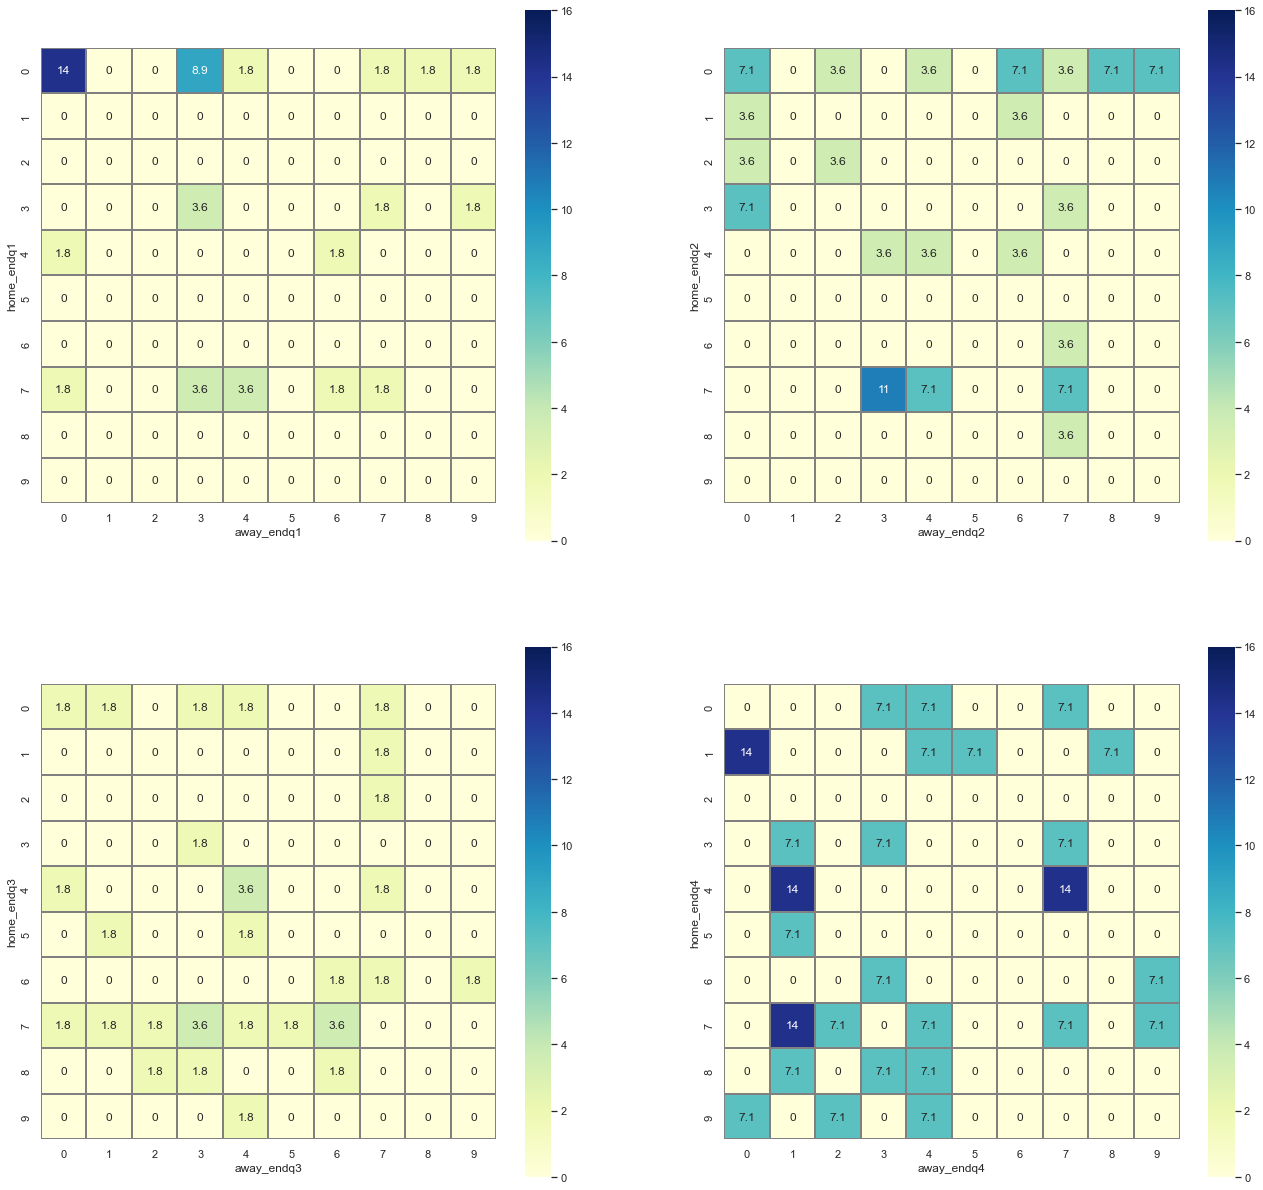

In [182]:
sns.set()

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
#ax5 = fig.add_subplot(3, 2, 5)


sns.heatmap(q1_score_count_ev, ax=ax1, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, vmax=16, square=True)
sns.heatmap(q2_score_count_ev, ax=ax2, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, vmax=16, square=True)
sns.heatmap(q3_score_count_ev, ax=ax3, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, vmax=16, square=True)
sns.heatmap(q4_score_count_ev, ax=ax4, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, vmax=16, square=True)
#sns.heatmap(allscores_count, ax=ax5, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, square=True)
#plt.savefig('SB_Squares_Heatmaps.png', dpi=120)

In [183]:
overall_ev = q1_score_count_ev + q2_score_count_ev + q3_score_count_ev + q4_score_count_ev



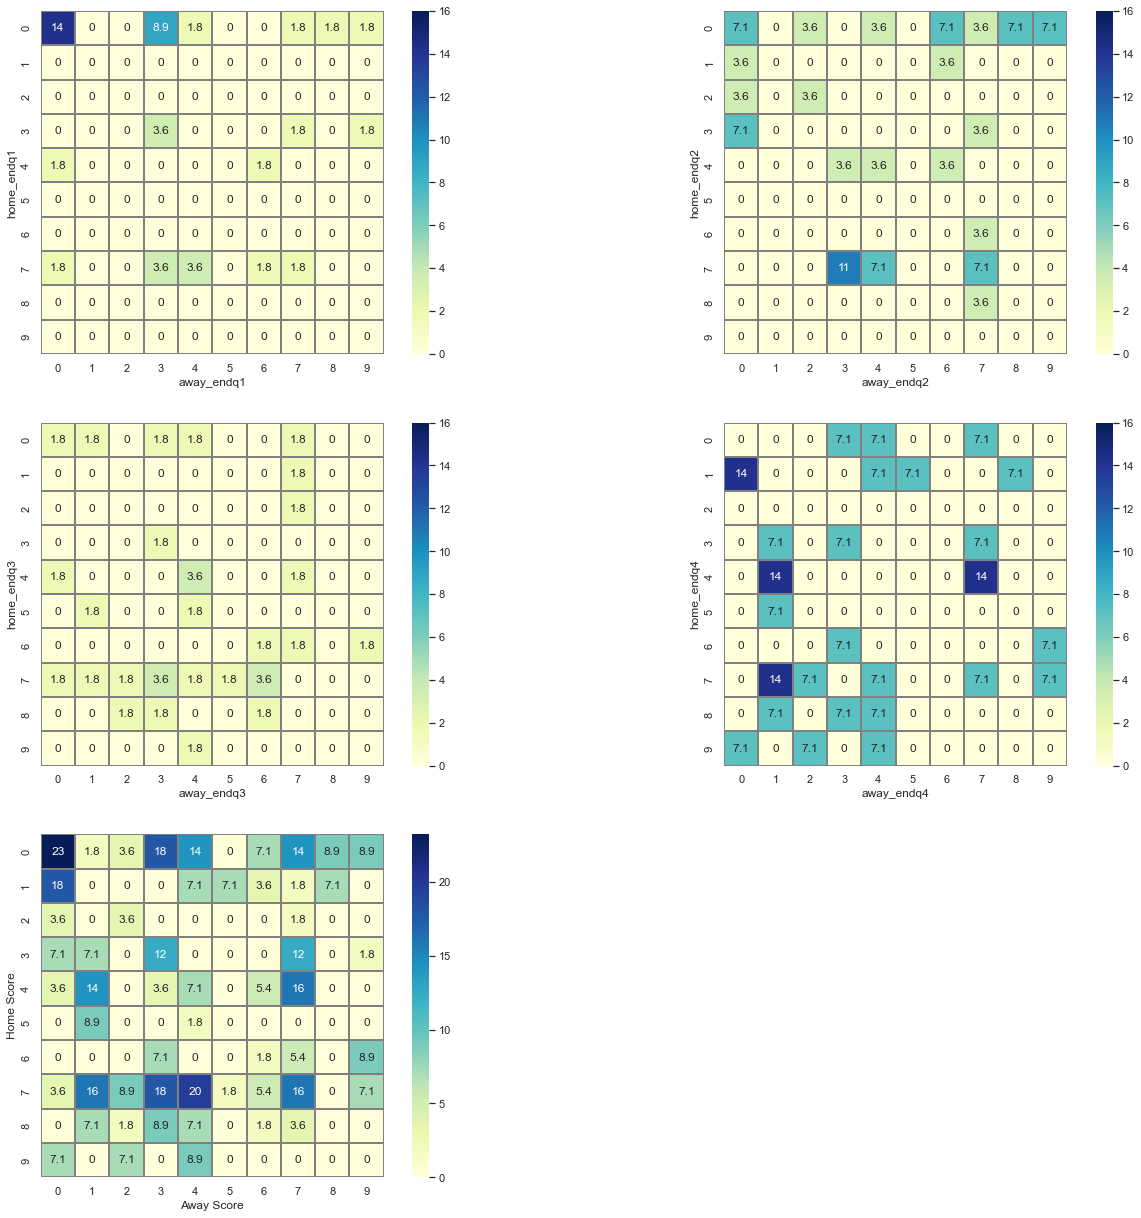

In [184]:
sns.set()

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)


sns.heatmap(q1_score_count_ev, ax=ax1, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, vmax=16, square=True)
sns.heatmap(q2_score_count_ev, ax=ax2, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, vmax=16, square=True)
sns.heatmap(q3_score_count_ev, ax=ax3, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, vmax=16, square=True)
sns.heatmap(q4_score_count_ev, ax=ax4, linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, vmax=16, square=True)
sns.heatmap(overall_ev, ax=ax5,  linewidths = 1, linecolor = "gray", cmap="YlGnBu", annot=True, square=True)

ax5.set_xlabel('Away Score')
ax5.set_ylabel('Home Score')

plt.savefig('SB_Squares_EV_Heatmaps.png', dpi=120)


In [185]:
overall_ev.values.sum()

428.5714285714286

In [186]:
allscores_count.values.sum()

116